# Import Libraries and Dataset

In [ ]:
#Import Libraries
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import rcParams # A module in matplotlib
import matplotlib as mpl
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
import plotly.express as px
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn import metrics
#!pip install unidecode
#import unidecode

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
import matplotlib.animation as animation
import operator
from collections import Counter

In [ ]:
rcParams['figure.figsize'] = (10, 8)
sns.set_style('ticks')
plt.style.use('seaborn-ticks')

In [ ]:
# Import the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/ALY6980 Capstone/capstone_df.csv"
df = pd.read_csv(path, index_col=[0])
df.shape

(16679, 22)

# EDA

In [ ]:
# Check columns
df.keys()

Index(['question', 'choices', 'answer', 'line', 'showContext', 'heading_name',
       'saved', 'type', 'saved.question', 'saved.choices', 'saved.answer',
       'saved.showContext', 'saved.heading_name', 'saved.type', 'book_id',
       'book_name', 'chapters.chapter_name', 'chapters.chapter_content',
       'chapters.keyphrase_saved_Question_count',
       'chapters.example_question_saved_count',
       'chapters.keyphrase_question_nonsaved_count',
       'chapters.example_nonsaved_count'],
      dtype='object')

In [ ]:
# Check proportion of SME saved questions
df['saved'].value_counts()

False    15033
True      1646
Name: saved, dtype: int64

In [ ]:
# Check the type of saved questions
df['saved.type'].value_counts()

Keyphrase    990
Example      656
Name: saved.type, dtype: int64

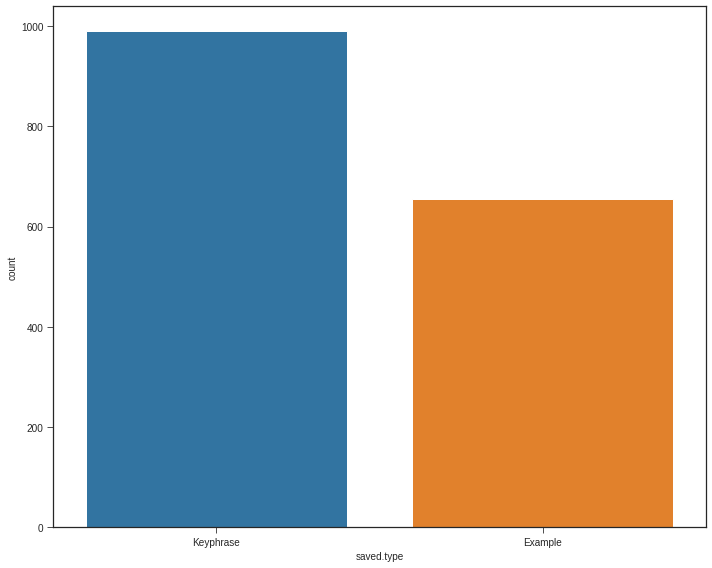

In [ ]:
# Create a boxplot of quantitative variables / check outliers
sns.countplot(x = df['saved.type'], data = df)
plt.tight_layout()

In [ ]:
# Do we need to analyze 'line' column
df['question'].unique()

array(['Net income under  _____________  is unaffected by changes in production levels.',
       'A  _____________  is an authorization form prepared for each expenditure.',
       'In contrast, under  _____________ , all fixed manufacturing costs are expensed in the current period.',
       ...,
       'Humans have only carotid bodies, which are found along the carotid  _____________  in the neck.',
       'The  _____________  are much more complex in body form than are most other unicellular eukaryotes .',
       'Humans, dogs, and many other animals exhibit high degrees of  _____________ .'],
      dtype=object)

In [ ]:
df.head(5)

,question,choices,answer,line,showContext,heading_name,saved,type,saved.question,saved.choices,saved.answer,saved.showContext,saved.heading_name,saved.type,book_id,book_name,chapters.chapter_name,chapters.chapter_content,chapters.keyphrase_saved_Question_count,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count
0,Net income under _____________ is unaffected...,"['Variable Cost Per Unit', 'Whenever Units Pro...",Variable Costing,Net income under variable costing is unaffecte...,<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Learning Objectives Review,True,Keyphrase,Net income under variable costing&nbsp;is unaf...,"['Production Capacity', 'Prices', 'Total Costs...",Sales,<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Learning Objectives Review,Keyphrase,120,Accounts,Chapter 19 Cost-Volume-Profit Analysis: Additi...,\n\n\n\n\n\nAs the following Feature Story abo...,56,16,893,9
1,A _____________ is an authorization form pre...,"['Apple Inc', 'Cisco', 'Supplies Expense', 'Ad...",Voucher,A voucher is an authorization form prepared fo...,"<p><b>Excerpt from Chapter: Chapter 7: Fraud, ...",Voucher System Controls,True,Keyphrase,A(n) _____________ is an authorization form pr...,"['voucher', 'supplies expense', 'accrued reven...",voucher,"<p><b>Excerpt from Chapter: Chapter 7: Fraud, ...",Voucher System Controls,Keyphrase,120,Accounts,"Chapter 7: Fraud, Internal Control, and Cash",\n\n\n\n\n\nAs the following Feature Story abo...,44,22,901,0
2,"In contrast, under _____________ , all fixed ...","['Variable Cost Per Unit', 'Whenever Units Pro...",Variable Costing,"In contrast, under variable costing, all fixed...",<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Variable Costing Example,True,Keyphrase,"Under ____________ costing, all ____________ m...","['Variable; Variable', 'Variable; Fixed', 'Fix...",Variable; Fixed,<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Variable Costing Example,Keyphrase,120,Accounts,Chapter 19 Cost-Volume-Profit Analysis: Additi...,\n\n\n\n\n\nAs the following Feature Story abo...,56,16,893,9
3,It is an earnings amount calculated as net inc...,"['Nike, Inc.', 'CPA', 'American Accounting Ass...",Stock,It is an earnings amount calculated as net inc...,<p><b>Excerpt from Chapter: Chapter 2: A Furth...,Decision Tools,True,Keyphrase,_____________ is the amount calculated as net ...,"['Retained Earnings; Bonds', 'Earnings Availab...",Earnings Available to Common Stockholders; Stock,<p><b>Excerpt from Chapter: Chapter 2: A Furth...,Decision Tools,Keyphrase,120,Accounts,Chapter 2: A Further Look at Financial Statements,\n\n\n\n\n\nIf you are thinking of purchasing ...,68,21,656,0
4,"For example, Nike golf clubs are sold at local...","['Differences', 'Similarities', 'HELPFUL HINT'...",What's Cooking?,"For example, Nike golf clubs are sold at local...",<p><b>Excerpt from Chapter: Chapter 8: Reporti...,What's Cooking?,True,Example,"When the due date is stated in months, the tim...","['Valuing Notes Receivable', 'Computing Intere...",Computing Interest of Notes Receivable,<p><b>Excerpt from Chapter: Chapter 8: Reporti...,What's Cooking?,Example,120,Accounts,Chapter 8: Reporting and Analyzing Receivables,"\n\n\n\n\n\nIn this chapter, we discuss some o...",34,18,1057,0


In [ ]:
# Take a look at each column of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16679 entries, 0 to 16678
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   question                                    16679 non-null  object
 1   choices                                     16679 non-null  object
 2   answer                                      16624 non-null  object
 3   line                                        16679 non-null  object
 4   showContext                                 16659 non-null  object
 5   heading_name                                16679 non-null  object
 6   saved                                       16679 non-null  bool  
 7   type                                        16679 non-null  object
 8   saved.question                              1646 non-null   object
 9   saved.choices                               1646 non-null   object
 10  saved.answer          

In [ ]:
# Check the number of NA
df.isna().sum()

question                                          0
choices                                           0
answer                                           55
line                                              0
showContext                                      20
heading_name                                      0
saved                                             0
type                                              0
saved.question                                15033
saved.choices                                 15033
saved.answer                                  15037
saved.showContext                             15033
saved.heading_name                            15033
saved.type                                    15033
book_id                                           0
book_name                                         0
chapters.chapter_name                             0
chapters.chapter_content                          0
chapters.keyphrase_saved_Question_count           0
chapters.exa

In [ ]:
df.describe()

,book_id,chapters.keyphrase_saved_Question_count,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count
count,16679.000000,16679.000000,16679.000000,16679.000000,16679.000000
mean,126.283710,40.792194,32.183404,780.695066,91.215061
std,6.274478,14.507256,26.846885,501.801849,87.600771
min,120.000000,0.000000,0.000000,2.000000,0.000000
25%,120.000000,35.000000,18.000000,386.000000,25.000000
50%,121.000000,39.000000,27.000000,701.000000,66.000000
75%,133.000000,48.000000,37.000000,1079.000000,145.000000
max,134.000000,78.000000,159.000000,2179.000000,370.000000


In [ ]:
df.nunique()

question                                      16130
choices                                        7707
answer                                         5321
line                                          13931
showContext                                    5644
heading_name                                   2924
saved                                             2
type                                              2
saved.question                                 1617
saved.choices                                  1569
saved.answer                                   1339
saved.showContext                              1459
saved.heading_name                              897
saved.type                                        2
book_id                                           5
book_name                                         5
chapters.chapter_name                           138
chapters.chapter_content                        138
chapters.keyphrase_saved_Question_count          43
chapters.exa

In [ ]:
#avg_df = combine_df.groupby(['region']).mean().reset_index()
dfb = df.groupby(['book_name']).count().reset_index()
dfb

,book_name,question,choices,answer,line,showContext,heading_name,saved,type,saved.question,...,saved.showContext,saved.heading_name,saved.type,book_id,chapters.chapter_name,chapters.chapter_content,chapters.keyphrase_saved_Question_count,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count
0,Accounts,6850,6850,6824,6850,6840,6850,6850,6850,347,...,347,347,347,6850,6850,6850,6850,6850,6850,6850
1,Business Studies Preliminary 7e,1667,1667,1667,1667,1665,1667,1667,1667,248,...,248,248,248,1667,1667,1667,1667,1667,1667,1667
2,Health and Human Development Units 3 and 4,1630,1630,1630,1630,1626,1630,1630,1630,149,...,149,149,149,1630,1630,1630,1630,1630,1630,1630
3,Hockenbury Psychology,1590,1590,1590,1590,1589,1590,1590,1590,283,...,283,283,283,1590,1590,1590,1590,1590,1590,1590
4,principle of life,4942,4942,4913,4942,4939,4942,4942,4942,619,...,619,619,619,4942,4942,4942,4942,4942,4942,4942


### Bar charts and pie chart

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

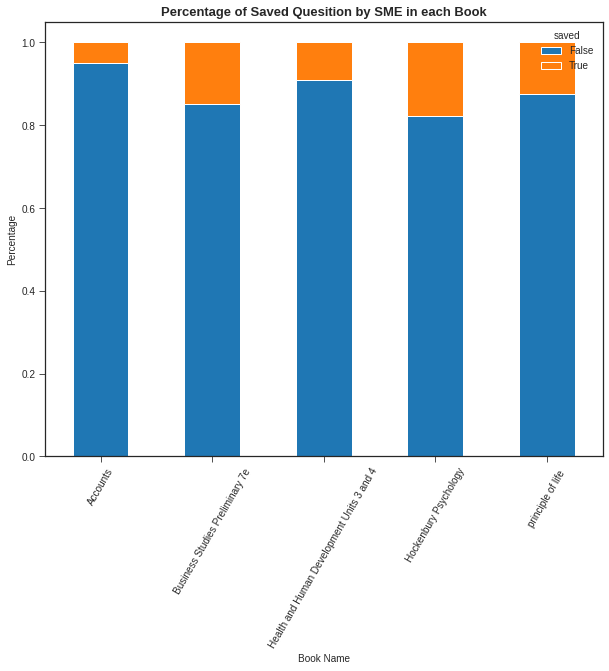

In [ ]:
# Draw stack bar char of book name cut by saved
table_book = pd.crosstab(df.book_name,df.saved)
table_book.div(table_book.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Percentage of Saved Quesition by SME in each Book', fontsize=13,fontweight="bold")
plt.xlabel('Book Name')
plt.ylabel('Percentage')
plt.xticks(rotation = 60)

In [ ]:
# Split dataframes by book name
a = df[df['book_name']=='Accounts']
b = df[df['book_name']=='Business Studies Preliminary 7e']
h = df[df['book_name']=='Health and Human Development Units 3 and 4']
psy = df[df['book_name']=='Hockenbury Psychology']
bio = df[df['book_name']=='principle of life ']

In [ ]:
books_l = df.book_name.unique().tolist()
num_c = []
for d in (a,b,h,psy,bio):
 num_c.append(len(d['chapters.chapter_name'].unique()))

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

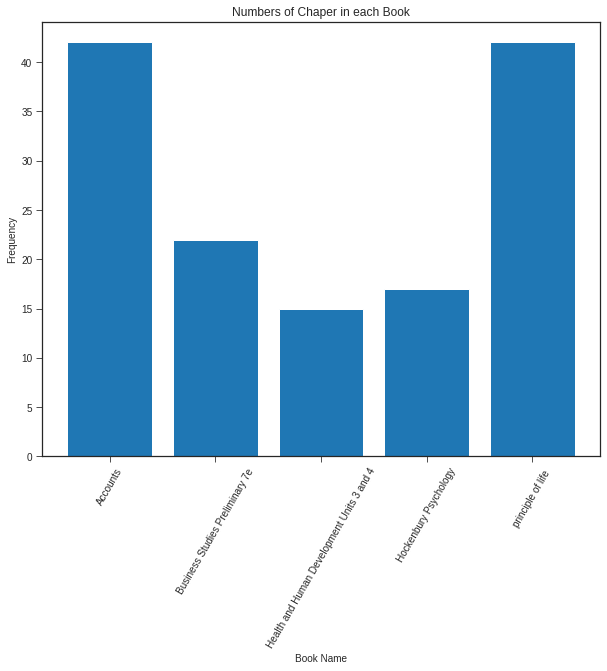

In [ ]:
# Frequency of chapters in each book
plt.bar(books_l,num_c)
plt.title('Numbers of Chapter in each Book')
plt.xlabel('Book Name')
plt.ylabel('Frequency')
plt.xticks(rotation = 60)

In [ ]:
# Pie Chart
total = len(df)
key = len(df[df['type']=='Keyphrase']) / total *100
ex = len(df[df['type']=='Example']) / total *100

# Percentage of subgroup
keyS = len(df.loc[(df['type']=='Keyphrase') & (df['saved']==True)]) / total *100
keyNS = len(df.loc[(df['type']=='Keyphrase') & (df['saved']==False)]) / total *100
exS = len(df.loc[(df['type']=='Example') & (df['saved']==True)]) / total *100
exNS = len(df.loc[(df['type']=='Example') & (df['saved']==False)]) / total *100

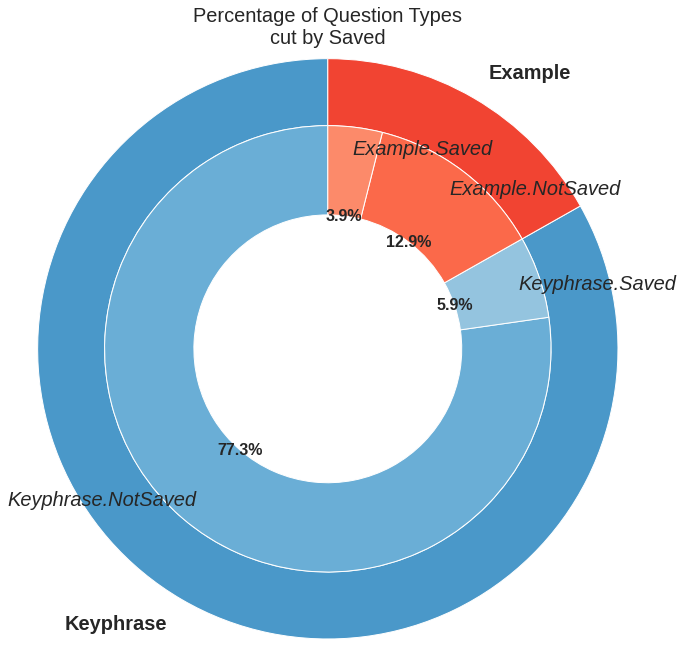

In [ ]:
# Lists of groups name and values 
group_names = ['Keyphrase','Example']
group_size = [key,ex]
subgroup_names = ['Keyphrase.NotSaved', 'Keyphrase.Saved', 'Example.NotSaved', 'Example.Saved']
subgroup_size = [keyNS,keyS,exNS,exS]
 
# Create colors
a, b = [plt.cm.Blues, plt.cm.Reds]
 
# First Ring(outside)
fig, ax = plt.subplots(figsize = (10,11))
ax.axis('equal')
mypie,texts = ax.pie(group_size, radius=1.3, labels = group_names, 
                     colors = [a(0.6), b(0.6)], startangle=90)
plt.setp(mypie,width = 0.3,edgecolor = 'white')
plt.setp(texts,size = 20,weight = 'bold')

# Second Ring(Inside)
mypie2,texts2,autotexts2 = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.9, 
                                  colors=[a(0.5), a(0.4), b(0.5), b(0.4)],autopct='%1.1f%%', startangle=90)
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.setp(texts2,size = 20, style='italic')
plt.setp(autotexts2,size = 16,weight = 'bold')
plt.margins(0,0)

# Set up the title
plt.title('Percentage of Question Types\ncut by Saved',size = 20)

# Show it
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in questions')

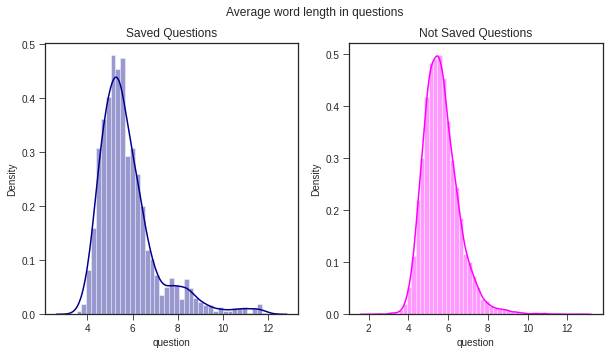

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word = df[df['saved'] == True]['question'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='darkblue')
ax1.set_title('Saved Questions')
word = df[df['saved'] == False]['question'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='magenta')
ax2.set_title('Not Saved Questions')
fig.suptitle('Average word length in questions')

### Top common punctuation

In [ ]:
from collections import defaultdict
from collections import Counter
#https://www.kaggle.com/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm/notebook
def create_corpus(target):
    corpus=[]
    for x in df[df['saved']==target]['question'].str.split():
      for i in x :
        corpus.append(i)
    return corpus

Counter({'.': 389, ',': 190, '+': 24, '-': 10, '=': 6, ':': 5, ';': 3, "'": 1, '&': 1, '*': 1, '?': 1})


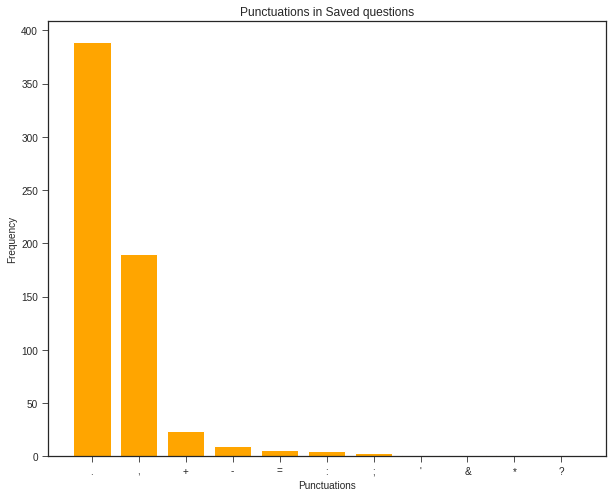

In [ ]:
#Punctuations in saved questions
corpus = create_corpus(1)
dd = defaultdict(int)
import string
punct = string.punctuation
for i in (corpus):
    if i in punct:
      dd[i]+=1
#x,y=zip(*dd.items())
x = Counter(dd)
plt.bar(*zip(*x.most_common()), color='orange')
# plt.bar(*zip(*c.most_common()), width=.5, color='g')
plt.title('Punctuations in Saved questions')
plt.xlabel('Punctuations')
plt.ylabel('Frequency')
print(x)

Counter({'.': 3538, ',': 2421, '$': 253, '+': 195, '=': 172, '?': 164, ':': 121, ';': 46, '&': 15, '|': 15, "'": 15, '*': 14, '-': 10, '/': 7, '(': 2, '+,': 1})


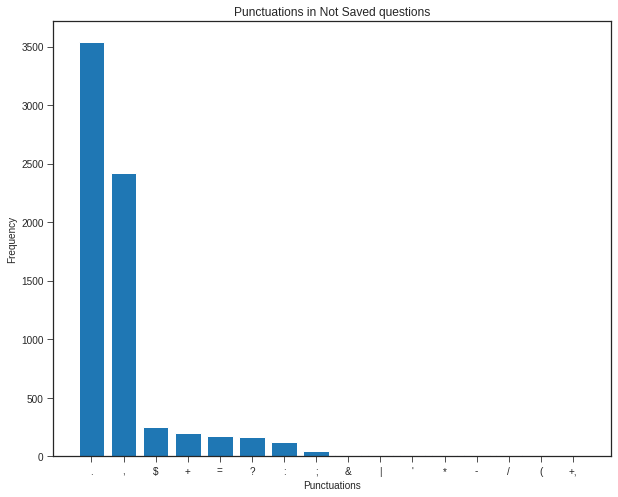

In [ ]:
#Punctuations in Edited-saved questions
corpus = create_corpus(0)
dd = defaultdict(int)
import string
punct = string.punctuation
for i in (corpus):
    if i in punct:
      dd[i]+=1
#x,y=zip(*dd.items())
x = Counter(dd)
plt.bar(*zip(*x.most_common()))
# plt.bar(*zip(*c.most_common()), width=.5, color='g')
plt.title('Punctuations in Not Saved questions')
plt.xlabel('Punctuations')
plt.ylabel('Frequency')
print(x)

# Data Cleaning

## Remove punctuation/stopwords, do lemmatization

In [ ]:
df_copy=df.copy()

In [ ]:
# Make it lowercase and remove unnecessary punctuation
# https://www.kaggle.com/tanulsingh077
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df_copy['q_clean'] = df_copy['question'].apply(clean_text)
df_copy['saved_q_clean'] = df_copy['saved.question'].apply(clean_text)

In [ ]:
import nltk
nltk.download('stopwords')
# Reomove stopwords
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
df_copy['q_clean'] = df_copy['q_clean'].apply(remove_stopwords)
df_copy['saved_q_clean'] = df_copy['saved_q_clean'].apply(remove_stopwords)
df_copy['q_clean'].unique()
df_copy['saved_q_clean'].unique()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['net income variable costingnbspis unaffected changes production levelsnbspnet income variable costing unaffected changes production levels instead closely tied changes ',
       ' authorization form prepared expenditure',
       ' costing  manufacturing costs expensed current period', ...,
       ' doublestranded molecule—that consists two separate  strands length',
       'atom consists nucleus containing  characteristic configuration nbspin orbitals around nucleus',
       'image numbered boxes bandnbsp'], dtype=object)

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
# Lemmatize the text
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df_copy['q_clean'] = df_copy['q_clean'].apply(lambda text: lemmatize_words(text))
df_copy['saved_q_clean'] = df_copy['saved_q_clean'].apply(lambda text: lemmatize_words(text))
df_copy['q_clean'].unique()
df_copy['saved_q_clean'].unique()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


array(['net income variable costingnbspis unaffected change production levelsnbspnet income variable costing unaffected change production level instead closely tie change',
       'authorization form prepared expenditure',
       'cost manufacturing cost expense current period', ...,
       'doublestranded molecule—that consist two separate strand length',
       'atom consist nucleus contain characteristic configuration nbspin orbitals around nucleus',
       'image number box bandnbsp'], dtype=object)

##Target encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_copy['saved']) # target variable='saved'

df_copy['saved_encoded'] = le.transform(df_copy['saved'])
df_copy.head()

,question,choices,answer,line,showContext,heading_name,saved,type,saved.question,saved.choices,...,book_name,chapters.chapter_name,chapters.chapter_content,chapters.keyphrase_saved_Question_count,chapters.example_question_saved_count,chapters.keyphrase_question_nonsaved_count,chapters.example_nonsaved_count,q_clean,saved_q_clean,saved_encoded
0,Net income under _____________ is unaffected...,"['Variable Cost Per Unit', 'Whenever Units Pro...",Variable Costing,Net income under variable costing is unaffecte...,<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Learning Objectives Review,True,Keyphrase,Net income under variable costing&nbsp;is unaf...,"['Production Capacity', 'Prices', 'Total Costs...",...,Accounts,Chapter 19 Cost-Volume-Profit Analysis: Additi...,\n\n\n\n\n\nAs the following Feature Story abo...,56,16,893,9,net income unaffected change production level,net income variable costingnbspis unaffected c...,1
1,A _____________ is an authorization form pre...,"['Apple Inc', 'Cisco', 'Supplies Expense', 'Ad...",Voucher,A voucher is an authorization form prepared fo...,"<p><b>Excerpt from Chapter: Chapter 7: Fraud, ...",Voucher System Controls,True,Keyphrase,A(n) _____________ is an authorization form pr...,"['voucher', 'supplies expense', 'accrued reven...",...,Accounts,"Chapter 7: Fraud, Internal Control, and Cash",\n\n\n\n\n\nAs the following Feature Story abo...,44,22,901,0,authorization form prepared expenditure,authorization form prepared expenditure,1
2,"In contrast, under _____________ , all fixed ...","['Variable Cost Per Unit', 'Whenever Units Pro...",Variable Costing,"In contrast, under variable costing, all fixed...",<p><b>Excerpt from Chapter: Chapter 19 Cost-Vo...,Variable Costing Example,True,Keyphrase,"Under ____________ costing, all ____________ m...","['Variable; Variable', 'Variable; Fixed', 'Fix...",...,Accounts,Chapter 19 Cost-Volume-Profit Analysis: Additi...,\n\n\n\n\n\nAs the following Feature Story abo...,56,16,893,9,contrast fixed manufacturing cost expense curr...,cost manufacturing cost expense current period,1
3,It is an earnings amount calculated as net inc...,"['Nike, Inc.', 'CPA', 'American Accounting Ass...",Stock,It is an earnings amount calculated as net inc...,<p><b>Excerpt from Chapter: Chapter 2: A Furth...,Decision Tools,True,Keyphrase,_____________ is the amount calculated as net ...,"['Retained Earnings; Bonds', 'Earnings Availab...",...,Accounts,Chapter 2: A Further Look at Financial Statements,\n\n\n\n\n\nIf you are thinking of purchasing ...,68,21,656,0,earnings amount calculate net income less divi...,amount calculate net income less dividend pay ...,1
4,"For example, Nike golf clubs are sold at local...","['Differences', 'Similarities', 'HELPFUL HINT'...",What's Cooking?,"For example, Nike golf clubs are sold at local...",<p><b>Excerpt from Chapter: Chapter 8: Reporti...,What's Cooking?,True,Example,"When the due date is stated in months, the tim...","['Valuing Notes Receivable', 'Computing Intere...",...,Accounts,Chapter 8: Reporting and Analyzing Receivables,"\n\n\n\n\n\nIn this chapter, we discuss some o...",34,18,1057,0,example nike golf club sell local country club...,due date state month time factor calculation n...,1


## Tokens visualization

### Wordcloud

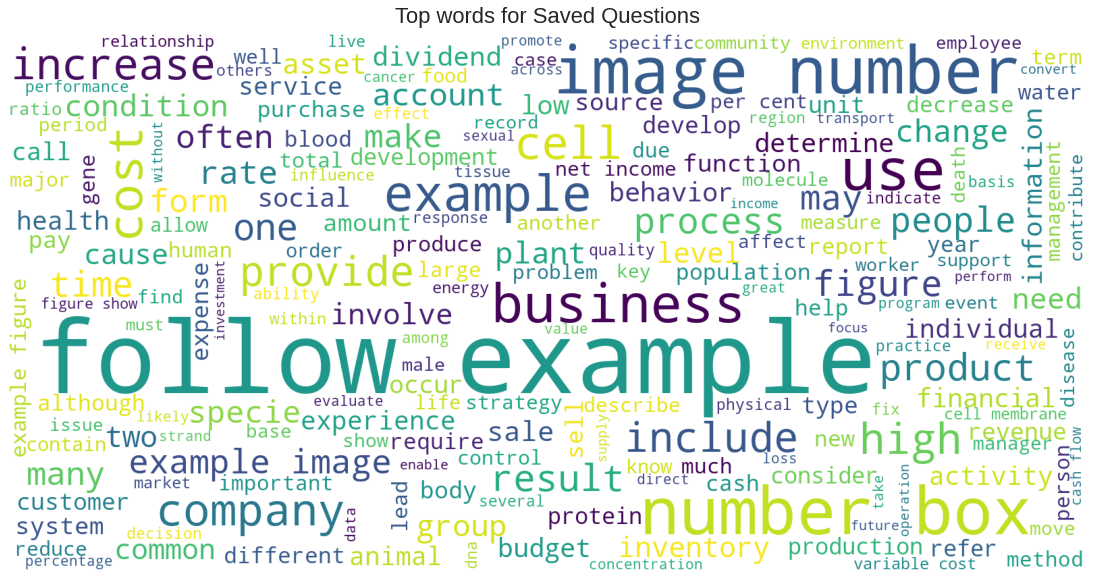

In [ ]:
# Word cloud of saved quesions edit by SMEs
wc = WordCloud(background_color='white', max_words=200,width=1600, height=800)

wc.generate(' '.join(text for text in df_copy.loc[df_copy['saved_encoded'] == True, 'q_clean']))
plt.figure(figsize=(15,12))
plt.title('Top words for Saved Questions', 
          fontdict={'size': 22, 'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
#plt.show()

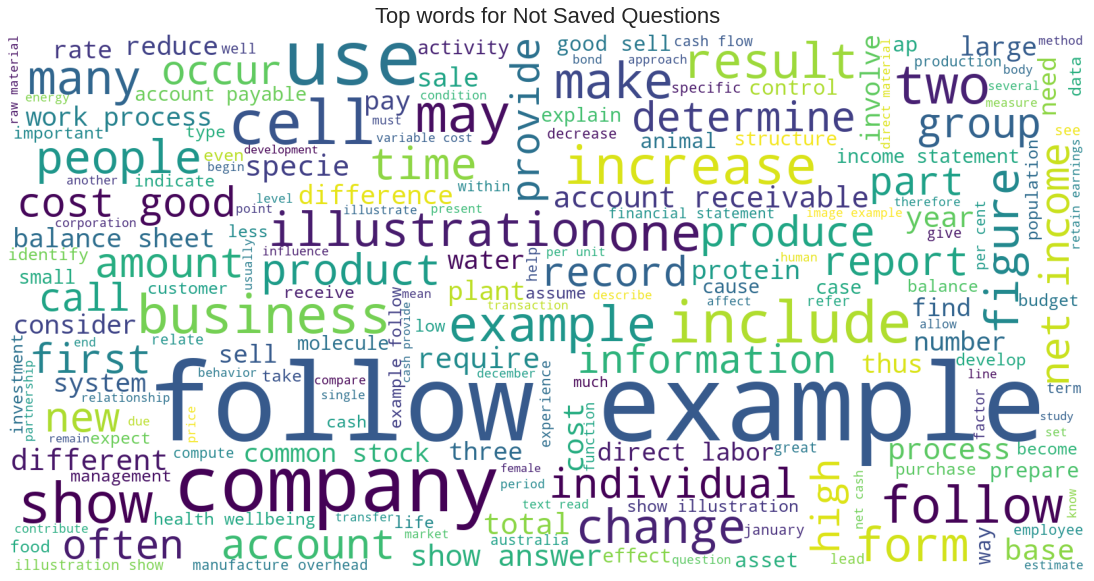

In [ ]:
# Word cloud of not saved quesions
wc = WordCloud(background_color='white', max_words=200,width=1600, height=800)

wc.generate(' '.join(text for text in df_copy.loc[df_copy['saved_encoded'] == False, 'q_clean']))
plt.figure(figsize=(15,12))
plt.title('Top words for Not Saved Questions', 
          fontdict={'size': 22, 'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)

### Ngram

Text(0, 0.5, 'bigram')

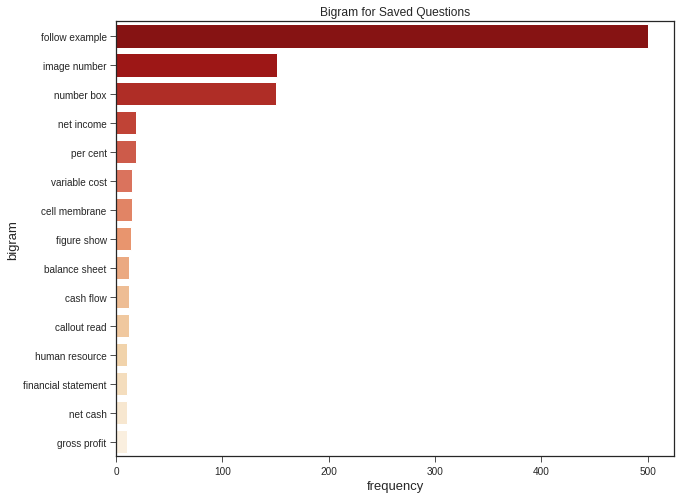

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Bigram analysis for saved questions
#https://www.kaggle.com/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm
def text_ngrams(corpus, n=None):
    cvec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#plt.figure(figsize=(10,5))
text_ngrams = text_ngrams(df_copy.loc[df_copy['saved_encoded'] == True, 'q_clean'])[:15]
x,y = map(list,zip(*text_ngrams))
sns.barplot(x=y,y=x,palette='OrRd_r')
plt.title('Bigram for Saved Questions')
plt.xlabel('frequency', size=13)
plt.ylabel('bigram', size=13)

Text(0, 0.5, 'bigram')

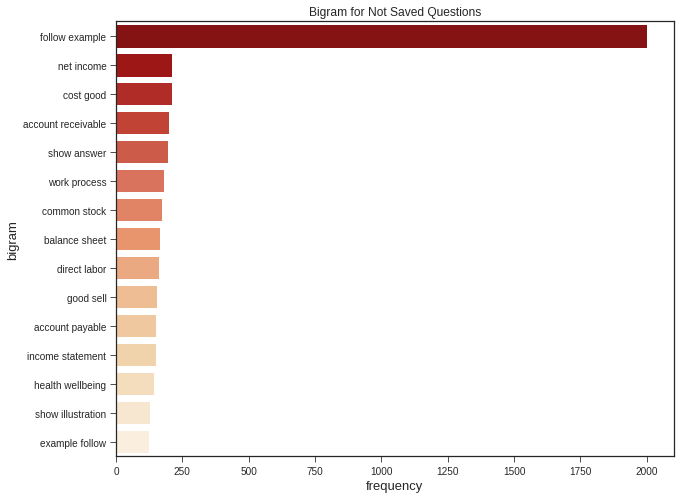

In [ ]:
#Bigram analysis for not saved questions
def text_ngrams(corpus, n=None):
    cvec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#plt.figure(figsize=(10,5))
text_ngrams = text_ngrams(df_copy.loc[df_copy['saved_encoded'] == False, 'q_clean'])[:15]
x,y = map(list,zip(*text_ngrams))
sns.barplot(x=y,y=x,palette='OrRd_r')
plt.title('Bigram for Not Saved Questions')
plt.xlabel('frequency', size=13)
plt.ylabel('bigram', size=13)

Text(0, 0.5, 'bigram')

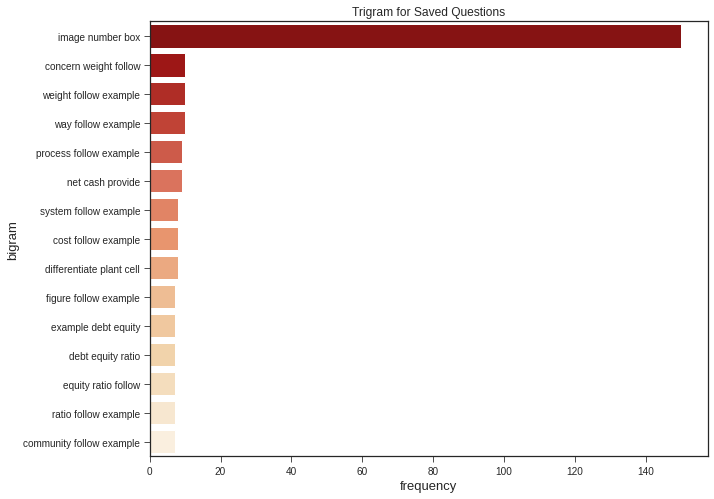

In [ ]:
def text_ngrams(corpus, n=None):
    cvec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#plt.figure(figsize=(10,5))
text_ngrams = text_ngrams(df_copy.loc[df_copy['saved_encoded'] == True, 'q_clean'])[:15]
x,y = map(list,zip(*text_ngrams))
sns.barplot(x=y,y=x,palette='OrRd_r')
plt.title('Trigram for Saved Questions')
plt.xlabel('frequency', size=13)
plt.ylabel('bigram', size=13)

Text(0, 0.5, 'bigram')

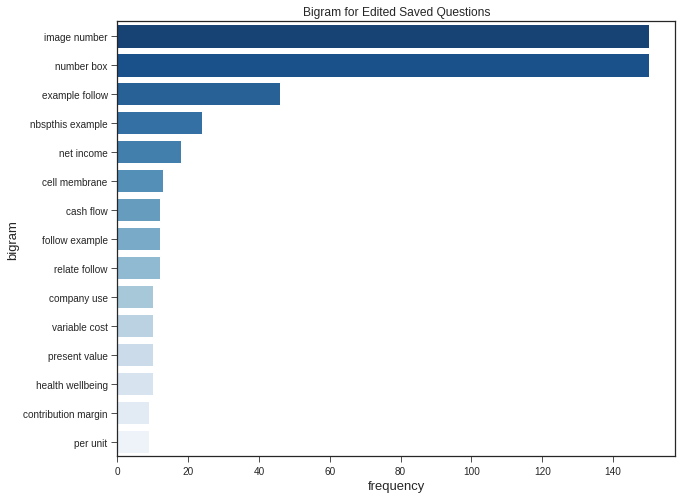

In [ ]:
#Bigram analysis for SME-edited Saved questions
def text_ngrams(corpus, n=None):
    cvec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#plt.figure(figsize=(10,5))
text_ngrams = text_ngrams(df_copy.loc[df_copy['saved_encoded'] == True, 'saved_q_clean'])[:15]
x,y = map(list,zip(*text_ngrams))
sns.barplot(x=y,y=x,palette='Blues_r')
plt.title('Bigram for Edited Saved Questions')
plt.xlabel('frequency', size=13)
plt.ylabel('bigram', size=13)

Text(0, 0.5, 'bigram')

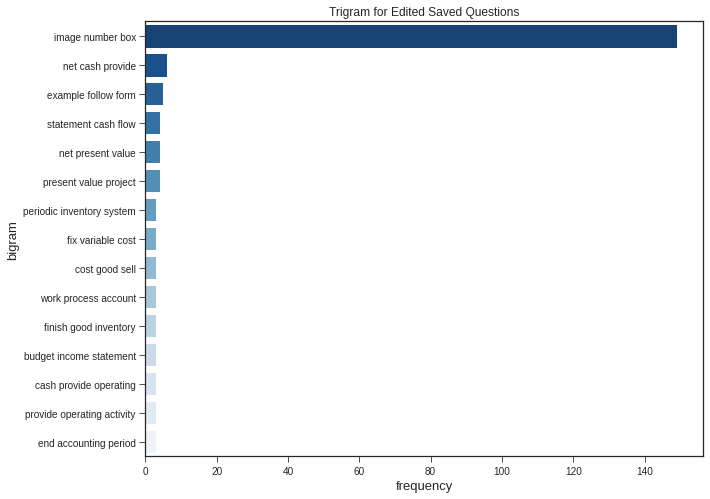

In [ ]:
#Trigram analysis for SME-edited Saved questions
def text_ngrams(corpus, n=None):
    cvec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#plt.figure(figsize=(10,5))
text_ngrams = text_ngrams(df_copy.loc[df_copy['saved_encoded'] == True, 'saved_q_clean'])[:15]
x,y = map(list,zip(*text_ngrams))
sns.barplot(x=y,y=x,palette='Blues_r')
plt.title('Trigram for Edited Saved Questions')
plt.xlabel('frequency', size=13)
plt.ylabel('bigram', size=13)

In [ ]:
def create_corpus(target):
    corpus=[]
    for x in df[df['saved']==target]['saved.question'].str.split():
      for i in x :
        corpus.append(i)
    return corpus

Counter({',': 16, '.': 14, '=': 4, '+': 2, '?': 2, '-': 2, ':': 1, ';': 1})


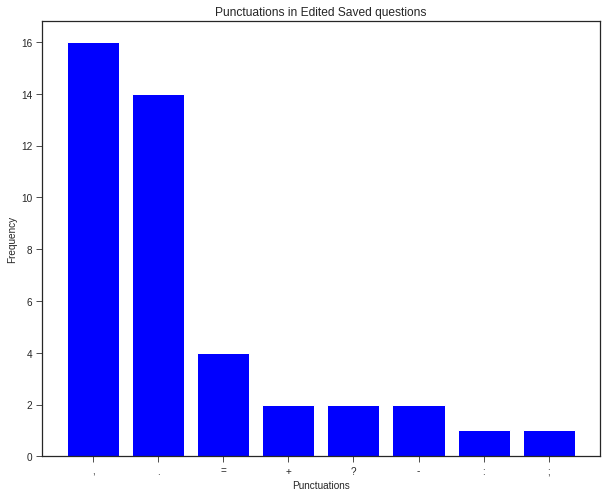

In [ ]:
#Punctuations in Edited-saved questions
corpus = create_corpus(1)
dd = defaultdict(int)
import string
punct = string.punctuation
for i in (corpus):
    if i in punct:
      dd[i]+=1
#x,y=zip(*dd.items())
x = Counter(dd)
plt.bar(*zip(*x.most_common()), color='blue')
# plt.bar(*zip(*c.most_common()), width=.5, color='g')
plt.title('Punctuations in Edited Saved questions')
plt.xlabel('Punctuations')
plt.ylabel('Frequency')
print(x)

# Vectorization

In [ ]:
# how to define X and y for use with COUNTVECTORIZER
x = df_copy['q_clean']
y = df_copy['saved_encoded']

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1) #42

In [ ]:
# https://datascience103579984.wordpress.com/2020/01/19/feature-engineering-for-nlp-in-python-from-datacamp/3/
# instantiate the vectorizer
vect = CountVectorizer() # Tuning increase 1% of accuracy # CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect.fit(x_train)
print("Vocabulary : ",vect.vocabulary_)

# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train) # count the occurence of each word: basically in ML terms "encoding documents"
x_test_dtm = vect.transform(x_test)
print("The shape of word count data frame: ",x_train_dtm.shape)
print("Word count array : \n",x_train_dtm.toarray())
# Convert a matrix into a DataFrame
x_train_dtm = pd.DataFrame(x_train_dtm.toarray())
 
# Map the column names to vocabulary 
x_train_dtm.columns = vect.get_feature_names_out()
x_train_dtm

Vocabulary :  {'abc': 5, 'radio': 8206, 'melbourne': 6210, 'nicole': 6745, 'mill': 6360, 'jan': 5351, 'data': 2466, 'source': 9430, 'violence': 10900, 'woman': 11178, 'emergency': 3263, 'say': 8894, 'human': 4722, 'right': 8708, 'watch': 11003, 'jemima': 5366, 'garrett': 4137, 'wire': 11154, 'information': 5042, 'disperse': 2874, 'via': 10873, 'medium': 6187, 'campaign': 1375, 'nutrition': 6901, 'website': 11042, 'seminar': 9052, 'health': 4503, 'professional': 7959, 'general': 4168, 'public': 8105, 'end': 3311, 'year': 11250, 'three': 10192, 'estimate': 3468, 'new': 6725, 'total': 10297, 'life': 5749, 'salvage': 8850, 'value': 10786, 'aihw': 260, 'australian': 778, 'burden': 1295, 'disease': 2856, 'study': 9742, 'impact': 4860, 'cause': 1481, 'illness': 4828, 'death': 2488, 'australia': 777, 'activity': 129, 'cost': 2241, 'pool': 7716, 'overhead': 7192, 'use': 10753, 'driver': 3048, 'per': 7430, 'order': 7087, 'receive': 8314, 'food': 3943, 'processing': 7945, 'packaging': 7255, 'labo

,aa,aaron,ab,abandon,abbreviate,abc,abdomen,abdomens,abdominal,aberkonkie,...,zulu,zwelethu,zxzyn,zygospore,zygote,µm,αchains,βchains,βglobin,μm
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12506,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12507,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.colors as mcolors
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not Saved')
            blue_patch = mpatches.Patch(color='blue', label='Saved')
            plt.legend(handles=[orange_patch, blue_patch])

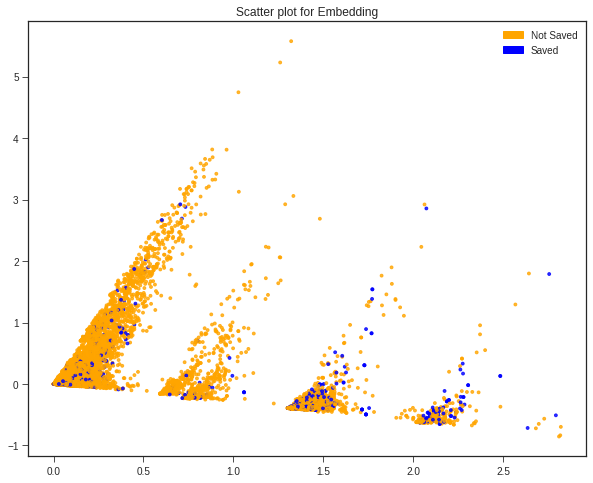

In [ ]:
plot_LSA(x_train_dtm, y_train)
plt.title('Scatter plot for Embedding')
plt.show()

In [ ]:
x_train

9248     abc radio melbourne nicole mill jan data sourc...
9877     information disperse via medium campaign nutri...
1250     end year three estimate new total life year ne...
8767     aihw australian burden disease study impact ca...
1325     activity cost pool estimate overhead estimate ...
                               ...                        
7813     zara’s original logo space use bold minimalist...
10955    roman numeral three arithmetic operator − allo...
5192     individual amount column post total control ac...
12172                                trait particular form
235      normal represent efficient level performance a...
Name: q_clean, Length: 12509, dtype: object

## TF-IDF FOR LSTM

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# Term Frequency(TF) - Inverse Document Frequency(IDF)
'''Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.'''
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(x_train_dtm)
print("The term frequncy of each feature \n", tfidf_transformer.idf_)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)
print("Applying learnt frequency knowledge to tramsform the count matrix to IDF matrix \n", x_train_tfidf.toarray())

The term frequncy of each feature 
 [9.74113642 9.74113642 8.13169851 ... 9.74113642 9.74113642 9.74113642]
Applying learnt frequency knowledge to tramsform the count matrix to IDF matrix 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Visualizing the embeddings

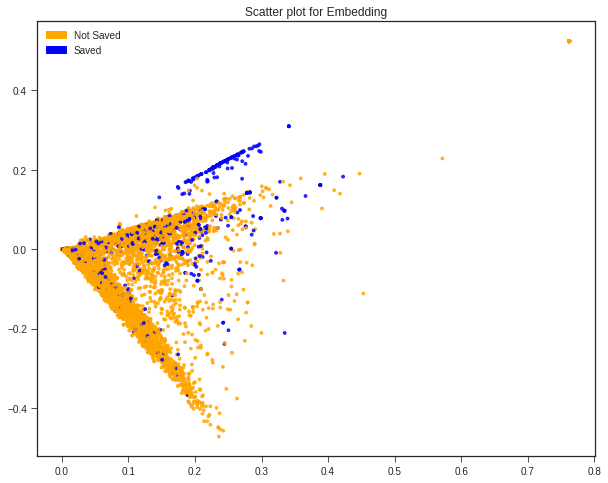

In [ ]:
plot_LSA(x_train_tfidf, y_train)
plt.title('Scatter plot for Embedding')
plt.show()

## Word Embeddings: GloVe

In [ ]:
texts = df_copy['q_clean']
target = df_copy['saved_encoded']

In [ ]:
from nltk.tokenize import word_tokenize
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

13735

In [ ]:
# Calculate the length of our vocabulary
# Tokenization
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

13735

###pad_sequences###


In [ ]:
nltk.download('punkt')
# Pad_sequences
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array([[  27,   12, 3288, ...,    0,    0,    0],
       [4857,   54, 1690, ...,    0,    0,    0],
       [ 712,  752,  231, ...,    0,    0,    0],
       ...,
       [ 100, 8085,   90, ...,    0,    0,    0],
       [ 244,  486,   90, ...,    0,    0,    0],
       [ 100, 1743,   42, ...,    0,    0,    0]], dtype=int32)

###GloVe###

In [ ]:
#GloVe
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('/content/drive/MyDrive/ALY6980 Capstone/glove.6B.100d.txt', encoding='utf8') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [ ]:
# Now we will load embedding vectors of those words that appear in the
# Glove dictionary. Others will be initialized to 0.

embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.12616999,  0.61724001,  0.22581001, ..., -1.07179999,
         0.52827001,  0.058813  ],
       [-0.39956   , -0.10511   ,  0.19318999, ..., -0.33967   ,
         0.21094   ,  0.48328   ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.56694001,  0.53657001, -0.31533   , ...,  0.13758001,
         1.09800005,  0.046777  ],
       [-0.34818   , -0.30770999, -0.83437997, ..., -0.72197998,
         0.15482   ,  0.56944001]])

# Models

### Multinomial Naive Bayes

In [ ]:
# Create a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

# Make class anf probability predictions
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))

0.8954436450839328
[[3636  143]
 [ 293   98]]


Text(66.5, 0.5, 'Actual Values')

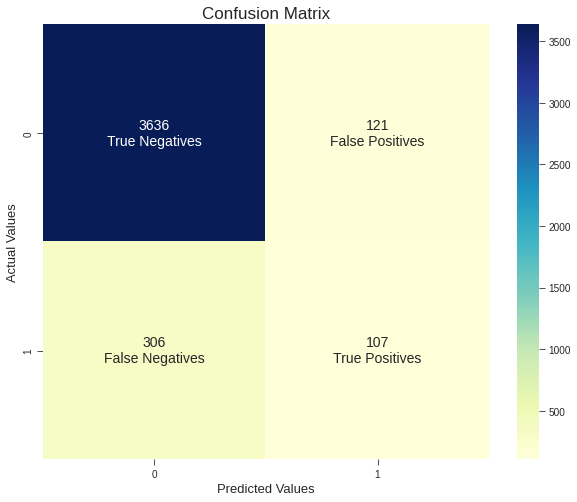

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14},fmt="d", cmap='YlGnBu')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=17)
plt.xlabel('Predicted Values', size=13)
plt.ylabel('Actual Values', size=13)

In [ ]:
# Calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.7046452755502078

### Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [ ]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))
print(metrics.confusion_matrix(y_test, y_pred_class))

0.9031175059952038
[[3756    1]
 [ 403   10]]


Text(66.5, 0.5, 'Actual Values')

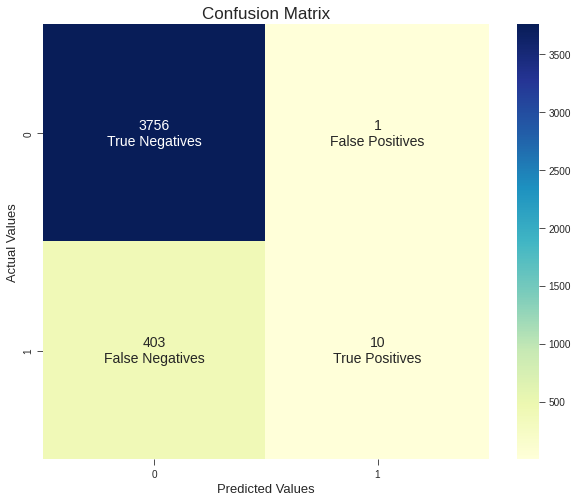

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14},fmt="d", cmap='YlGnBu')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=17)
plt.xlabel('Predicted Values', size=13)
plt.ylabel('Actual Values', size=13)

### XGBoost

In [ ]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [ ]:
# Fit the pipeline with the data
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print(metrics.confusion_matrix(y_test, y_pred_class))

Train: 0.9168598609001519
Test: 0.913189448441247
[[3755    2]
 [ 360   53]]


Text(66.5, 0.5, 'Actual Values')

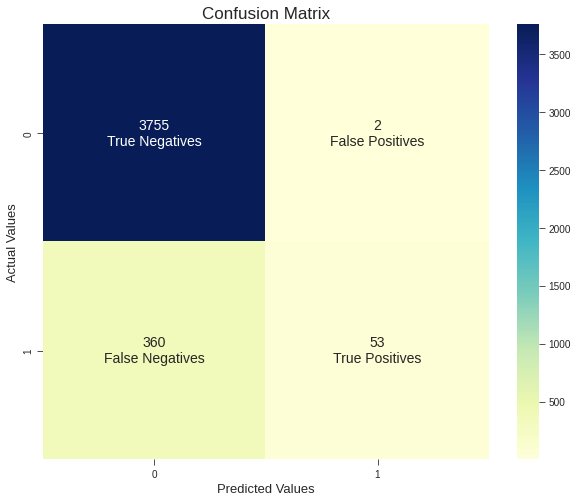

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14},fmt="d", cmap='YlGnBu')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=17)
plt.xlabel('Predicted Values', size=13)
plt.ylabel('Actual Values', size=13)

### LSTM

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_padded_sentences, target, test_size=0.25)

In [ ]:
# Model from https://www.kaggle.com/mariapushkareva/nlp-disaster-tweets-with-glove-and-lstm/data

def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
    
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 44, 100)           1373500   
                                                                 
 bidirectional (Bidirectiona  (None, 44, 88)           51040     
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 88)               0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 88)               352       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 88)                0         
                                                        

In [ ]:
# Load the model and train!!

model = glove_lstm()

checkpoint = ModelCheckpoint(
    'model.h5', 
    monitor = 'val_loss', 
    verbose = 1, 
    save_best_only = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = 'val_loss', 
    factor = 0.2, 
    verbose = 1, 
    patience = 5,                        
    min_lr = 0.001
)
history = model.fit(
    X_train, 
    y_train, 
    epochs = 7,
    batch_size = 32,
    validation_data = (X_test, y_test),
    verbose = 1,
    callbacks = [reduce_lr, checkpoint]
)

Epoch 1/7
391/391 [==============================] - ETA: 0s - loss: 0.4065 - accuracy: 0.8748
Epoch 1: val_loss improved from inf to 0.35182, saving model to model.h5
391/391 [==============================] - 62s 136ms/step - loss: 0.4065 - accuracy: 0.8748 - val_loss: 0.3518 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 2/7
391/391 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.9000
Epoch 2: val_loss improved from 0.35182 to 0.29817, saving model to model.h5
391/391 [==============================] - 41s 105ms/step - loss: 0.3384 - accuracy: 0.9000 - val_loss: 0.2982 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 3/7
391/391 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.8999
Epoch 3: val_loss improved from 0.29817 to 0.28657, saving model to model.h5
391/391 [==============================] - 42s 106ms/step - loss: 0.3212 - accuracy: 0.8999 - val_loss: 0.2866 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 4/7
391/391 [============================

In [ ]:
#Check the result
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

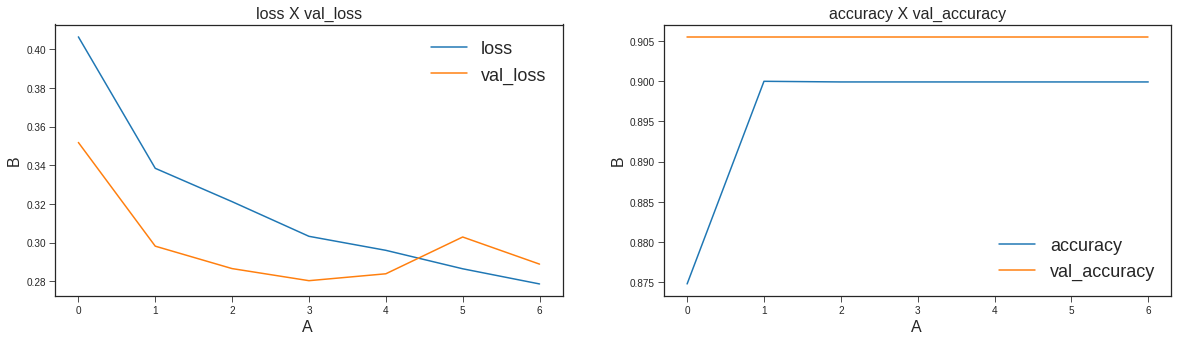

In [ ]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

131/131 [==============================] - 4s 29ms/step - loss: 0.2889 - accuracy: 0.9055
Loss: 0.28887513279914856
Accuracy: 0.9055156111717224


In [ ]:
from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)
def metrics(pred_tag, y_test):
    print("F1-score: ", f1_score(pred_tag, y_test))
    print("Precision: ", precision_score(pred_tag, y_test))
    print("Recall: ", recall_score(pred_tag, y_test))
    print("Acuracy: ", accuracy_score(pred_tag, y_test))
    print("-"*50)
    print(classification_report(pred_tag, y_test))
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)
    
preds = model.predict_classes(X_test)
metrics(preds, y_test)

AttributeError: ignored

Text(66.5, 0.5, 'Actual Values')

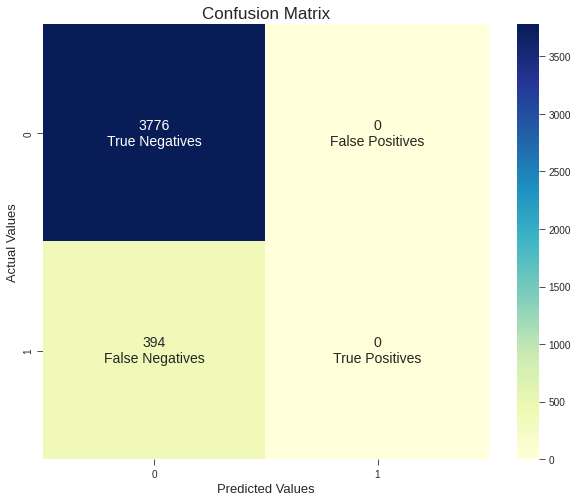

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
y_preds = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_preds)
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 14},fmt="d", cmap='YlGnBu')
cmlabels = ['True Negatives', 'False Positives',
              'False Negatives', 'True Positives']
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=17)
plt.xlabel('Predicted Values', size=13)
plt.ylabel('Actual Values', size=13)